<a href="https://colab.research.google.com/github/eknoor2001/IPL-Analysis-and-Match-Winner-Prediction/blob/main/DS203_Project_IPL_Analysis_and_Match_Prediction_using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# First Part (Analysis of IPL)

##Installing and Importing Required Libraries

In [ ]:
#Geopandas installation

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 

# Install rtree - Geopandas requirment
!apt install python3-rtree 

# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install descartes - Geopandas requirment
!pip install descartes 

# Install Folium for Geographic data visualization
!pip install folium

# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-dckpwjih
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-dckpwjih


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

!python3.7 -m pip install --upgrade pip
!pip install pywaffle
from pywaffle import Waffle 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import cufflinks as cf 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

import random

     |████████████████████████████████| 1.7 MB 33.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 526 kB 34.9 MB/s            


In [ ]:
#random_colors defining for graphs of variuous colors

def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

## Importing Dataset

In [ ]:
deliveries = pd.read_csv('/content/IPL Matches 2008-2020.csv')
matches = pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')

##Inspection and Cleaning of Data

In [ ]:
#printing number of rows and columns of matches

print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')

Number of rows    = 193468
Number of columns = 18


In [ ]:
#Header of matches dataset

matches.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
#printing number of rows and columns of deliveries

print(f'Number of rows    = {len(deliveries)}')
print(f'Number of columns = {len(deliveries.columns)}')

Number of rows    = 816
Number of columns = 17


In [ ]:
#Header of deliveries dataset

deliveries.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
#Null values in matches dataset

matches.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [ ]:
#columns in the matches dataset

matches.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
#Null values in delivery dataset

deliveries.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
#Columns of deliveries dataset

deliveries.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
#Unique names of teams that have won
print(deliveries['winner'].unique())

#Unique names of cities where matches have been hosted
print(deliveries['city'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 nan 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [ ]:
#Renaming teams for uniformity

deliveries.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [ ]:
#Replacing Bangalore with Bengaluru for uniformity

deliveries.replace('Bangalore','Bengaluru', inplace = True)

In [ ]:
#Fill missing values to prevent errors

deliveries['winner'].fillna(deliveries['result'], inplace = True)
deliveries['player_of_match'].fillna(deliveries['result'], inplace = True)
deliveries['city'].fillna(deliveries['venue'], inplace = True)
deliveries['umpire1'].fillna('unknown', inplace = True)
deliveries['umpire2'].fillna('unknown', inplace = True)

## Total Number of Matches till Year 2020

In [ ]:
#using date of match to divide into season(year)

deliveries["season"] = deliveries["date"].apply(lambda x:x.split("-")[0])

In [ ]:
seasons_data = deliveries["season"].value_counts()

total_matches = deliveries.groupby('season')['id'].count()
data = [go.Bar(
    x = seasons_data.index,
    y = seasons_data.values,
    marker = dict(color = random_colors(len(seasons_data.index)),line=dict(color='#000001', width=1.5))
)]

layout = go.Layout(
   {
      "title":"Total number of matches till 2020 (2008-2019)",
   }
)

#Plotting on the Colab platform
fig = go.Figure(data=data,layout = layout)
from IPython.display import HTML
HTML(fig.to_html())

## Total Wins by Each Team

In [ ]:
data = [go.Bar(
    x = deliveries['winner'].value_counts().index,
    y = deliveries['winner'].value_counts().values,
    marker = dict(color = random_colors(len(deliveries['winner'].value_counts().index)),line=dict(color='#000002', width=1.5))
)]

layout = go.Layout(
   {
      "title":"Total number of wins by each team till 2020",
   }
)

fig = go.Figure(data=data,layout = layout)
fig.show()
from IPython.display import HTML
HTML(fig.to_html())


##Toss Win Analysis

In [ ]:
trace1 = go.Bar(x=deliveries["winner"].value_counts().index, y=deliveries["winner"].value_counts().values,name="match win")
trace2 = go.Bar(x=deliveries["toss_winner"].value_counts().index, y=deliveries["toss_winner"].value_counts().values,name="toss win")

# Fill out  data with our traces
data = [trace1, trace2]
# Create layout and specify title, legend and so on


layout = go.Layout(title="Total number of wins for every team till 2020",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"),
                   legend=dict(x=1.0, y=0.5)
                   ,barmode="group")


# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

In [ ]:
Total_matches_played = deliveries['team1'].value_counts() + deliveries['team2'].value_counts()

toss_won = deliveries['toss_winner'].value_counts()
toss_win_success_rate = (toss_won/Total_matches_played)*100
toss_win_success_rate_sort = toss_win_success_rate.sort_values(ascending = False)
toss_win_success_rate_sort

data = [go.Bar(
    x = toss_win_success_rate.sort_values(ascending=False).index,
    y = toss_win_success_rate.sort_values(ascending=False).values,
    marker = dict(color = random_colors(len(toss_win_success_rate.sort_values(ascending=False).index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Toss Win Success Ratio. [Toss Won/Total Matches Played]",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
from IPython.display import HTML
HTML(fig.to_html())

## Player of the Match 

In [ ]:
data = [go.Bar(
    x = deliveries['player_of_match'].value_counts()[:20].index,
    y = deliveries['player_of_match'].value_counts()[:20].values,
    marker = dict(color = random_colors(20),line=dict(color='#000000', width=1.5))
)]


layout = go.Layout(title="Total number of Player of the match. ",
                   xaxis=dict(title="Name of the top 20 Player of the match."),
                   yaxis=dict(title="Number of Player of the match titles won"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
from IPython.display import HTML
HTML(fig.to_html())

## Success Rate of Winning Matches

In [ ]:
matches_won = deliveries.groupby('winner').count()
total_matches = deliveries['team1'].value_counts() + deliveries['team2'].value_counts()

matches_won['Total matches'] = total_matches
win_df = matches_won[["Total matches","result"]]
success_ratio = round((matches_won['id']/total_matches),4)*100
success_ratio_sort = success_ratio.sort_values(ascending = False)

data = [go.Bar(
    x = success_ratio_sort.index,
    y = success_ratio_sort.values,
    marker = dict(color = random_colors(len(success_ratio_sort.index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Success rate of Teams (Matches Won Per 100 Matches Played",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Success rate of wining"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
from IPython.display import HTML
HTML(fig.to_html())

##Most IPL Titles Won

In [ ]:
each_season_winner = deliveries.groupby('season')['season','winner'].tail(1)
each_season_winner_sort = each_season_winner.sort_values('season',ascending = True)

data = [go.Bar(
    x = each_season_winner_sort["winner"].value_counts().index,
    y = each_season_winner_sort["winner"].value_counts().values,
    marker = dict(color = random_colors(len(each_season_winner_sort["winner"].value_counts().index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Most Titles Wins",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of seasons won by any team."))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

##Top IPL Players in Terms of Runs

In [ ]:
batting_tot=matches.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 

data = [go.Bar(
    x = top_batsmen.batsman,
    y = top_batsmen.Runs,
    marker = dict(color = random_colors(10),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Top 10 Batsmen in IPL- Seasons till 2020",
                   xaxis=dict(title="Top 10 Batsmen"),
                   yaxis=dict(title="Runs Scored"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Best Batting Performances in a Match

In [ ]:
batting_ings=matches.groupby(['id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=matches.groupby(['id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,matches,how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'markers',
    name="Strike Rate"
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'markers',
    name="Run"
)
layout = go.Layout(title="IPL Best batting performances in a Match",
                   xaxis=dict(title="Batsmen"),
                   yaxis=dict(title="Strike Rate/Innings Score"))


# Fill out  data with our traces
data = [trace1, trace2]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

##Top Bowlers of IPL

In [ ]:
bowling_wickets=matches[matches['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

trace1 = go.Scatter(
    x = top_bowlers['bowler'].values,
    y = top_bowlers['Wickets'].values,
    mode = 'lines+markers',
)

layout = go.Layout(title="Top 10 Bowlers in IPL- Seasons 2008-2020",
                   xaxis=dict(title="TOP 10 Bowlers"),
                   yaxis=dict(title="Wickets Taken"))


# Fill out  data with our traces
data = [trace1]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

##Best Bowling Performances in a Match

In [ ]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
match_bowling_tot=bowling_wickets.groupby(['id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['id','bowler','Wickets']][0:10] 
match_bowling_runs=matches.groupby(['id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,matches,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']


trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'markers',
    name="Wickets"
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name="Run Per Wicket"
)

layout = go.Layout(title="IPL Best bowling performances in a Match",
                   xaxis=dict(title="Top Bowlers"),
                   yaxis=dict(title="Runs per Wicket/Wickets"))


# Fill out  data with our traces
data = [trace1, trace2]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

##Top Cities to Host IPL Matches

In [ ]:
city_counts= deliveries.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:10]

trace = go.Pie(labels = top_cities.city.values, values =top_cities["Match Counts"].values,
               marker=dict(colors = random_colors(10), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Top Cities that have hosted IPL Matches",
   }
)

fig = go.Figure(data=data,layout = layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Results based on D/L Method 

In [ ]:
deliveries["method"].fillna("Non D/L",inplace=True)
data = [go.Bar(
    x = deliveries["method"].value_counts().index.values,
    y = deliveries["method"].value_counts().values,
    marker = dict(color = random_colors(3),line=dict(color='#000000', width=2))
)]

layout = go.Layout(
   {
      "title":"Results Based on Duckworth-Lewis",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

trace = go.Pie(labels = deliveries["method"].value_counts().index.values, values = deliveries["method"].value_counts().values,
                            hole = 0.2,
               marker=dict(colors = random_colors(3), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Results Based on Duckworth-Lewis",
   }
)

fig = go.Figure(data=data,layout = layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Top Umpires of IPL based on number of matches

In [ ]:
data = pd.DataFrame({"umpire":deliveries["umpire1"].tolist() + deliveries["umpire2"].tolist()},columns=['umpire'])
data = [go.Bar(
    x = data["umpire"].value_counts().index[:10],
    y = data["umpire"].value_counts().values[:10],
    marker = dict(color = random_colors(10),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top 10 Umpire to feature in max number of matches",
   }
)
fig = go.Figure(data=data,layout = layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Season Wise Match Summary of Matches Won by Runs

In [ ]:
data = {"season":deliveries["season"], 
        "winsbyrun":deliveries[deliveries['result_margin']!=0]['result_margin']} 
df = pd.concat(data, 
               axis = 1) 

fig = px.strip(df, x="season", y="winsbyrun")
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Analysis of Dismissal Reasons in IPL 

In [ ]:
data = [go.Bar(
    x = matches["dismissal_kind"].value_counts().index,
    y = matches["dismissal_kind"].value_counts().values,
    marker = dict(color = random_colors(len(matches["dismissal_kind"].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top Most Dismissal Kind",
   }
)
fig = go.Figure(data=data,layout = layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Best Fielders in IPL History

In [ ]:
data = [go.Bar(
    x =matches["fielder"].value_counts().index[:10],
    y = matches["fielder"].value_counts().values[:10],
    marker = dict(color = random_colors(10),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top 10 Best Fielders in the Field ",
   }
)
fig = go.Figure(data=data,layout = layout)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

## Analysis of Over-Wise Runs and Wickets


In [ ]:
fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().total_runs.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Runs'
   )
)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())



In [ ]:
fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().is_wicket.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Wickets'
   )
)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

In [ ]:
fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().extra_runs.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Extra Runs'
   )
)
# Create a plot in your Python script 
from IPython.display import HTML
HTML(fig.to_html())

#Second Part (Prediction of Match Winner - Training and Execution)

In [ ]:
#importing libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')
display(matches)
display(deliveries)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
#to print no. of rows and columns in matches
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')

Number of rows    = 636
Number of columns = 18


In [ ]:
matches[pd.isnull(matches['winner'])]      #to find the null data in 'winner' column


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [ ]:
matches['winner'].fillna('Draw', inplace=True)  #replace the null value in winner with Draw

In [ ]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Draw']
                ,[1,2,3,4,5,6,7,8,9,10,11,11,12,13,14],inplace=True)   #replacing team name with a key

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches[pd.isnull(matches['city'])]   #to find the null data in 'city' column

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
matches['city'].fillna('Dubai',inplace=True)    #replace the nullvalue in city as Dubai


In [ ]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
dicVal = encode['winner']
print(dicVal['MI']) #printing the key value of the team
print(list(dicVal.keys())[list(dicVal.values()).index(1)])   #to find key by value search 

1
MI


In [ ]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [ ]:
final = pd.DataFrame(matches)   #creating the final database

In [ ]:
tossw=final['toss_winner'].value_counts(sort=True)  #count of toss wins 
matchw=final['winner'].value_counts(sort=True)   #count of match wins
print('No. of toss won by each team')
for i, val in tossw.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(i)],val))
print('No. of matches won by each team')
for i, val in matchw.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(i)],val))

No. of toss won by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No. of matches won by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


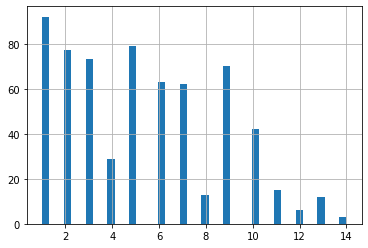

In [ ]:
final['winner'].hist(bins=42)  #plot of winner column

Text(0.5, 1.0, 'MATCH WINNERS')

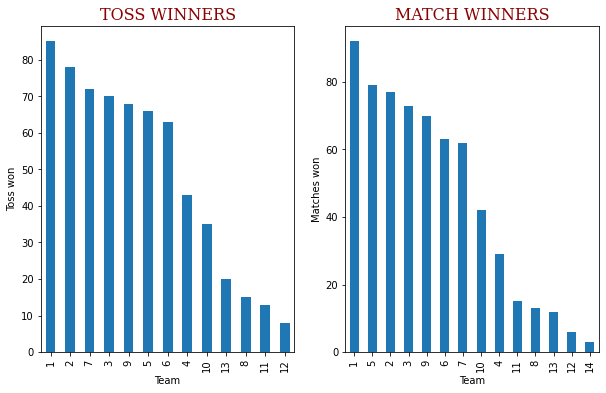

In [ ]:
fig = plt.figure(figsize=(10,6))
lb1 = fig.add_subplot(121)  #plot of toss winners
lb1.set_xlabel('Team')
lb1.set_ylabel('Toss won')
lb1.set_title("TOSS WINNERS",fontdict= {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16})
tossw.plot(kind='bar')

lb2 = fig.add_subplot(122)   #plot of match winners
matchw.plot(kind = 'bar')
lb2.set_xlabel('Team')
lb2.set_ylabel('Matches won')
lb2.set_title("MATCH WINNERS",fontdict= {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16})

In [ ]:
 final.apply(lambda x: sum(x.isnull()),axis=0) #null values

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [ ]:
#to build the predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    final[i] = le.fit_transform(final[i])
final.dtypes 

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [ ]:
#Define function for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])    #for the accuracy of the model
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(n_splits=7)
  error = []
  for train, test in kf.split(data[predictors]):       #for the Cross validation score of the model
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [ ]:
#importance of features

imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

#feature importance: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city

team2            0.248846
team1            0.223992
venue            0.171498
toss_winner      0.171141
city             0.152383
toss_decision    0.032138
dtype: float64


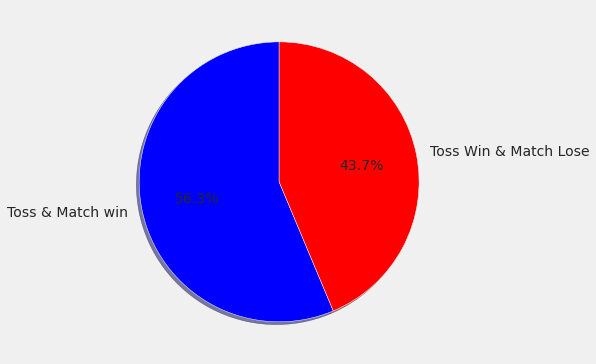

In [ ]:
#toss win vs match win analysis
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
final_fil=final[final['toss_winner']==final['winner']]
slices=[len(final_fil),(577-len(final_fil))]
mlt.pie(slices,labels=['Toss & Match win','Toss Win & Match Lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['b','r'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

#clearly, not much dependent!

In [ ]:
#Logistic Regression Model

outcome_var=['winner']

predictor_var = ['team1','team2','toss_winner']

model = LogisticRegression(max_iter=1000)
classification_model(model, final, predictor_var, outcome_var)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy : 24.686%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

Cross-Validation Score : 22.482%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, final,predictor_var,outcome_var)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy : 89.151%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was p

Cross-Validation Score : 48.594%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
#SVM

from sklearn.svm import SVC
model = SVC()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, final,predictor_var,outcome_var)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy : 40.723%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

Cross-Validation Score : 34.425%


In [ ]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue','toss_winner']
classification_model(model, final,predictor_var,outcome_var)

Accuracy : 89.151%
Cross-Validation Score : 50.492%


In [ ]:
#predicting

team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner]]
input = np.array(input).reshape((1, -1))
output=model.predict(input)    #key of the winner
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

KKR


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
#predicting

team1='DC'
team2='DD'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner]]
input = np.array(input).reshape((1, -1))
output=model.predict(input)    #key of the winner
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

DD


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

